# Sentiment analysis

## Carga de datos

In [19]:
%matplotlib inline

import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from json import loads as json_loads

In [20]:
c = ['date', 'file', 'date2', 'log', 'app', 'beat', 'front', 'is_log', 'msg', 'offset', 'arch']

data = pd.read_csv('input-logs-example-file.csv', names=c)
data['beat_json'] = data['beat'].apply(lambda x: json_loads(x))
data['hostname'] = data['beat_json'].apply(lambda x: x['hostname'])
data['name'] = data['beat_json'].apply(lambda x: x['name'])
data['version'] = data['beat_json'].apply(lambda x: x['version'])
data.head()

,date,file,date2,log,app,beat,front,is_log,msg,offset,arch,beat_json,hostname,name,version
0,2001-01-01T23:50:59.128Z,/var/log/httpd/error.log,2001-01-01T23:50:55.720Z,apache_error_publicdomain,publicdomain-server,"{""hostname"":""198-51-100-15"",""name"":""198-51-100...",publicdomain-front-server,log,[Sun Jan 1 23:50:54.580972 2001] [client 198.5...,74712401,apache_error,"{'hostname': '198-51-100-15', 'name': 'publicd...",198-51-100-15,publicdomain-front-server,2.7.1
1,2001-01-01T23:50:58.294Z,/var/log/resources-server.log,2001-01-01T23:50:53.871Z,resources-store,resource,"{""hostname"":""198-51-100-15"",""name"":""198-51-100...",backend-server,log,01/01/2001 18:50:50.768 [706b16b2fb732ab6079a1...,66118672,gothic,"{'hostname': '198-51-100-15', 'name': '198-51-...",198-51-100-15,198-51-100-15,1.7.0
2,2001-01-01T23:50:58.297Z,/var/log/httpd/access.log,2001-01-01T23:50:53.601Z,apache_access-store,resource,"{""hostname"":""198-51-100-15"",""name"":""198-51-100...",backend-server,log,198.51.100.17 - - [12/Jan/2001:18:50:50 -0100]...,12334352,apache_access,"{'hostname': '198-51-100-15', 'name': '198-51-...",198-51-100-15,198-51-100-15,1.7.0
3,2001-01-01T23:50:58.294Z,/var/log/resources-server.log,2001-01-01T23:50:53.872Z,resources-store,resource,"{""hostname"":""198-51-100-15"",""name"":""198-51-100...",backend-server,log,01/01/2001 18:50:50.769 [706b16b2fb732ab6079a1...,66123425,gothic,"{'hostname': '198-51-100-15', 'name': '198-51-...",198-51-100-15,198-51-100-15,1.7.0
4,2001-01-01T23:50:58.297Z,/var/log/resources-server.log,2001-01-01T23:50:53.872Z,resources-store,resource,"{""hostname"":""198-51-100-15"",""name"":""198-51-100...",backend-server,log,01/01/2001 18:50:50.768 [706b16b2fb732ab6079a1...,66120241,gothic,"{'hostname': '198-51-100-15', 'name': '198-51-...",198-51-100-15,198-51-100-15,1.7.0


In [21]:
nlp = spacy.load('en')
def tokenize(msg):
    return [token.lower_ for token in nlp(msg) if not token.is_punct | token.is_space]  

In [22]:
origen = data['msg'].apply(tokenize)

In [23]:
df_words = pd.DataFrame(origen)
df_words.columns = ['words']
df_words.head(20)

,words
0,"[sun, jan, 1, 23:50:54.580972, 2001, client, 1..."
1,"[01/01/2001, 18:50:50.768, 706b16b2fb732ab6079..."
2,"[198.51.100.17, 12/jan/2001:18:50:50, -0100, p..."
3,"[01/01/2001, 18:50:50.769, 706b16b2fb732ab6079..."
4,"[01/01/2001, 18:50:50.768, 706b16b2fb732ab6079..."
5,"[01/01/2001, 18:50:50.768, 706b16b2fb732ab6079..."
6,"[01/01/2001, 18:50:50.769, 706b16b2fb732ab6079..."
7,"[01/01/2001, 18:50:50.760, 706b16b2fb732ab6079..."
8,"[01/01/2001, 18:50:50.768, 706b16b2fb732ab6079..."
9,"[01/01/2001, 18:50:50.941, 706b16b2fb732ab6079..."


## Carga del diccionario por defecto

### Diccionario SentiWordNet
#### SentiWordNet 3.0 by Stefano Baccianella, Andrea Esuli, and Fabrizio Sebastiani (http://sentiwordnet.isti.cnr.it)

In [24]:
url = "https://drive.google.com/uc?id=0B0ChLbwT19XcOVZFdm5wNXA5ODg"
file = "SentiWordNet_3.0.0_20130122.tgz"

import urllib
import shutil

with urllib.request.urlopen(url) as response, open(file, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    
!tar -xvf SentiWordNet_3.0.0_20130122.tgz --strip-components=5
!rm SentiWordNet_3.0.0_20130122.tgz

home/swn/www/admin/dump/SentiWordNet_3.0.0_20130122.txt


In [25]:
dic_file = "SentiWordNet_3.0.0_20130122.txt"

senti_raw = pd.read_csv(
    dic_file, 
    sep="\t", 
    names=["POS", "ID", "PosScore", "NegScore", "SynsetTerms", "Gloss"], 
    skiprows=27,
    skipfooter=1,
    engine='python'
)
senti_raw = senti_raw[(senti_raw['PosScore'] + senti_raw['NegScore']) != 0]

assimetric_terms = senti_raw[(senti_raw['PosScore']==1) | (senti_raw['NegScore']==1)]
senti_raw.head()

,POS,ID,PosScore,NegScore,SynsetTerms,Gloss
0,a,1740,0.125,0.00,able#1,(usually followed by `to') having the necessar...
1,a,2098,0.000,0.75,unable#1,(usually followed by `to') not having the nece...
10,a,3700,0.250,0.00,dissilient#1,"bursting open with force, as do some ripe seed..."
11,a,3829,0.250,0.00,parturient#2,"giving birth; ""a parturient heifer"""
20,a,5107,0.500,0.00,uncut#7 full-length#2,"complete; ""the full-length play"""


In [26]:
import re

exploded = senti_raw['SynsetTerms'].apply(lambda x: re.split("\s+", x)).apply(pd.Series)
exploded.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,able#1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unable#1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,dissilient#1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,parturient#2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,uncut#7,full-length#2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
senti_exploded = pd.concat([senti_raw[["PosScore", "NegScore"]], exploded], axis=1)
senti_norm = pd.melt(senti_exploded, id_vars=["PosScore", "NegScore"], value_vars=range(0,25))
senti_norm = senti_norm[senti_norm['value'].notnull()]
senti_norm['value'] = senti_norm['value'].apply(lambda x: re.sub("#\d+", "", x))
# senti_norm.sort_values(by='value')
df_senti = senti_norm.groupby("value").mean()
df_senti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39746 entries, 'hood to zymotic
Data columns (total 2 columns):
PosScore    39746 non-null float64
NegScore    39746 non-null float64
dtypes: float64(2)
memory usage: 931.5+ KB


In [28]:
df_senti['NegScore'] = df_senti['NegScore'] * -1

df_senti.head()

,PosScore,NegScore
value,,
'hood,0.000,-0.375
.22,0.125,-0.000
0,0.000,-0.500
1,0.000,-0.250
101,0.000,-0.250


In [29]:
!rm SentiWordNet_3.0.0_20130122.txt

## Load of the sentiment dictionary

In [30]:
def get_model(vocab):
    def _app(words_list):
        dfw = pd.DataFrame(words_list)
        dfw.columns = ['words']

        dfw = dfw.set_index('words')
        dfw = dfw.join(vocab, how='left').fillna(0)

        return dfw.apply(sum, axis=1).sum()
    return _app

In [31]:
senti_model = get_model(df_senti)

senti_scores = df_words['words'].apply(senti_model)
msgs_sent_score = pd.concat([data['msg'], senti_scores], axis=1)
msgs_sent_score.columns = ['msg', 'senti']
msgs_sent_score.head()

,msg,senti
0,[Sun Jan 1 23:50:54.580972 2001] [client 198.5...,-0.125000
1,01/01/2001 18:50:50.768 [706b16b2fb732ab6079a1...,-0.915231
2,198.51.100.17 - - [12/Jan/2001:18:50:50 -0100]...,-0.125000
3,01/01/2001 18:50:50.769 [706b16b2fb732ab6079a1...,0.000000
4,01/01/2001 18:50:50.768 [706b16b2fb732ab6079a1...,-0.062500


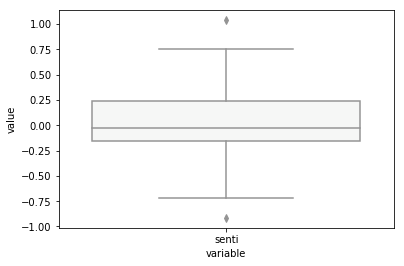

In [32]:
df_boxplot = msgs_sent_score[["senti"]]
melted_box = pd.melt(df_boxplot, value_vars=["senti"])

sns.boxplot(x="variable", y="value", data=melted_box, palette="PRGn")
plt.show()

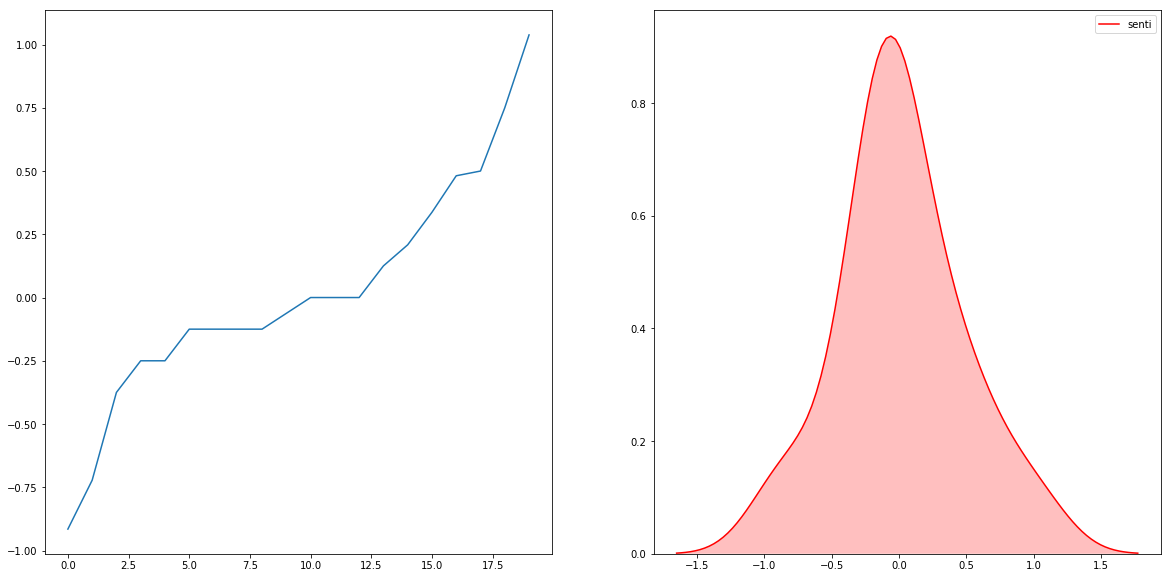

In [33]:
sort_senti = msgs_sent_score.sort_values(by="senti").reindex()

plt.subplots(figsize=(20,10))

plt.subplot(121)
plt.plot(msgs_sent_score.index.tolist(), sort_senti['senti'])

plt.subplot(122)
p1=sns.kdeplot(msgs_sent_score['senti'], shade=True, color="r")

plt.show()

In [34]:
len(msgs_sent_score[msgs_sent_score['senti'] < 0]['msg'].tolist())

10

In [35]:
test_msg = msgs_sent_score[msgs_sent_score['senti'] > 0]['msg'][5]

test_words = tokenize(test_msg)
scored = map(lambda x: (x, senti_model([x])), test_words)
sorted_words = sorted(scored, key=lambda x: x[1], reverse=True)
filtered_words = filter(lambda x: x[1] != 0, sorted_words)
list(filtered_words)

[('good', 0.6630434782608695), ('interesting', 0.375)]

In [36]:
test_msg = msgs_sent_score[msgs_sent_score['senti'] < 0]['msg'][1]

test_words = tokenize(test_msg)
scored = map(lambda x: (x, senti_model([x])), test_words)
sorted_words = sorted(scored, key=lambda x: x[1], reverse=True)
filtered_words = filter(lambda x: x[1] != 0, sorted_words)
list(filtered_words)

[('like', 0.2875),
 ('large', 0.14285714285714285),
 ('words', -0.125),
 ('a', -0.125),
 ('too', -0.125),
 ('number', -0.125),
 ('boring', -0.25),
 ('bad', -0.5955882352941176)]

# Freq analysis 

In [37]:
from collections import Counter

x = data['msg'].apply(lambda x: Counter(x.lower()))
letters = x.apply(pd.Series)

letters.head()

,,!,"""",',),",",-,.,/,0,...,s,t,u,v,w,x,y,{,},ñ
0,11.0,NaN,NaN,NaN,1.0,NaN,1.0,6.0,NaN,6.0,...,6.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,NaN,NaN,NaN,NaN,1.0,4.0,2.0,2.0,12.0,...,13.0,2.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0
2,10.0,NaN,2.0,NaN,NaN,NaN,3.0,4.0,5.0,11.0,...,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,10.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,10.0,...,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
def freq_model(msgs):
    letters = msgs.apply(lambda x: Counter(x.lower())).apply(pd.Series)
    stats = pd.DataFrame([letters.mean(), letters.std()]).T.dropna()
    stats.columns = ["mean", "std"]
    stats['min'] = stats['mean'] - stats['std']
    stats['max'] = stats['mean'] + stats['std']
    return stats

letter_space = freq_model(data['msg'])
letter_space.head()

,mean,std,min,max
,10.20,3.138890,7.061110,13.338890
"""",2.00,0.000000,2.000000,2.000000
",",1.20,0.447214,0.752786,1.647214
-,1.50,1.043185,0.456815,2.543185
.,2.45,1.637553,0.812447,4.087553


In [39]:
letter_space = letter_space[letter_space['min'] != letter_space['max']]

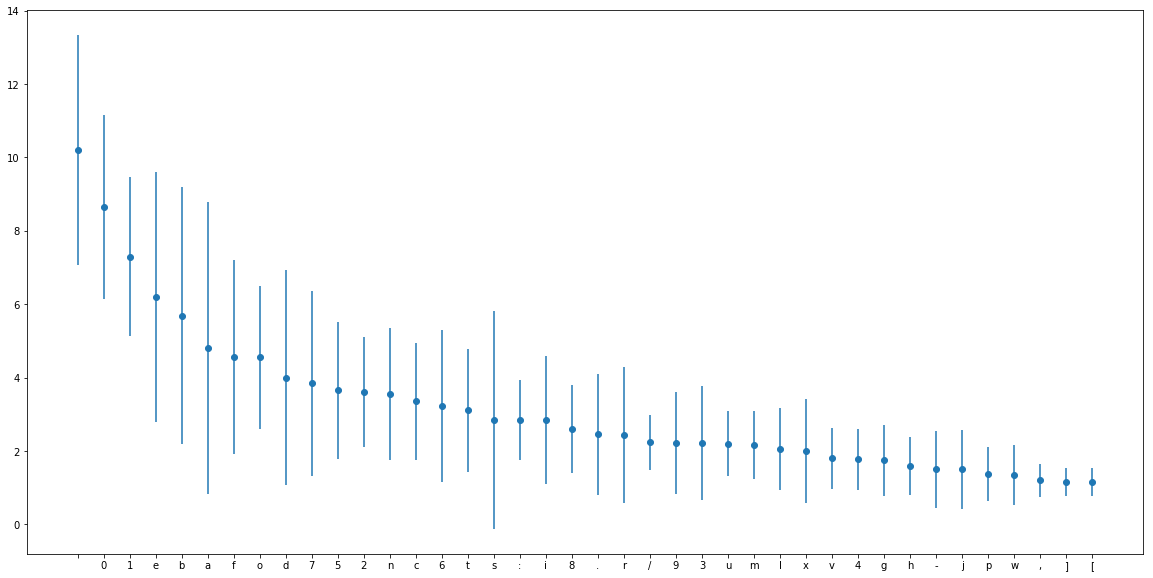

In [40]:
def render_letter_space(space):
    plt.subplots(figsize=(20, 10))
    sp = space.reset_index()
    sp.columns=['char', 'mean', 'std', 'min', 'max']
    sp = sp.fillna(0)
    sp = sp.sort_values('mean', ascending=False)
    sp = sp.reset_index()[['char', 'mean', 'std']]
    plt.xticks(sp.index, sp.char.values.tolist())
    plt.errorbar(sp.index, sp['mean'], yerr=sp['std'], fmt='o')

render_letter_space(letter_space)
plt.show()

In [41]:
def freq_model(in_col):
    char_df = in_col.apply(lambda x: Counter(x.lower())).apply(pd.Series).fillna(0).T
    cols = char_df.columns.tolist()
    char_df = letter_space[['min', 'max']].join(char_df, how="left")
    char_df['f'] = char_df['max'] - char_df['min']
    for c in cols:
        char_df[c] = char_df[c] - char_df['min']
        char_df[c] = char_df[c] / char_df['f']
    return char_df[cols]
char_df = freq_model(data['msg'])
char_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
,0.627434,2.061061,0.468142,0.149558,-0.009734,0.786726,0.149558,1.105309,0.308850,0.786726,0.308850,0.627434,1.105309,0.468142,-0.009734,0.308850,0.468142,0.149558,0.149558,-0.009734
",",-0.841641,0.276393,-0.841641,-0.841641,-0.841641,1.394427,-0.841641,0.276393,-0.841641,0.276393,-0.841641,-0.841641,0.276393,-0.841641,-0.841641,-0.841641,-0.841641,-0.841641,-0.841641,-0.841641
-,0.260349,1.698253,1.218952,0.260349,0.260349,0.260349,0.260349,-0.218952,0.260349,0.739651,0.260349,0.260349,-0.218952,0.260349,0.260349,0.260349,0.260349,0.260349,0.260349,1.698253
.,1.583935,0.362600,0.973267,0.057266,0.057266,0.057266,0.057266,0.057266,0.057266,0.057266,0.667934,1.583935,0.973267,0.057266,0.667934,0.667934,0.667934,0.667934,0.667934,0.057266
/,-0.985350,0.343647,2.337143,0.343647,0.343647,0.343647,0.343647,0.343647,0.343647,0.343647,0.343647,-0.985350,-0.985350,0.343647,0.343647,0.343647,0.343647,0.343647,0.343647,1.008146


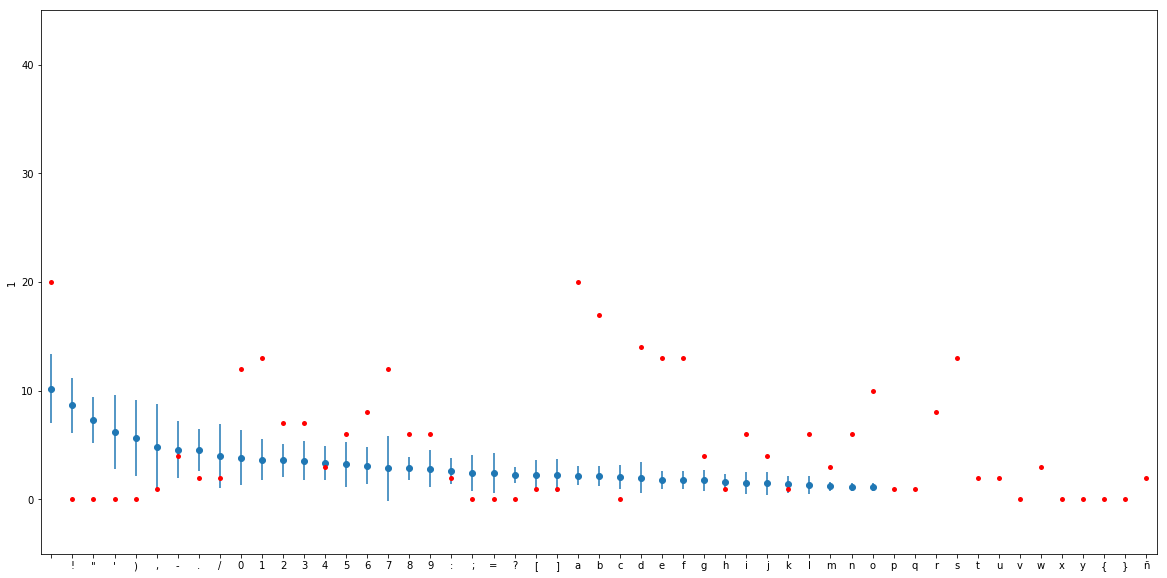

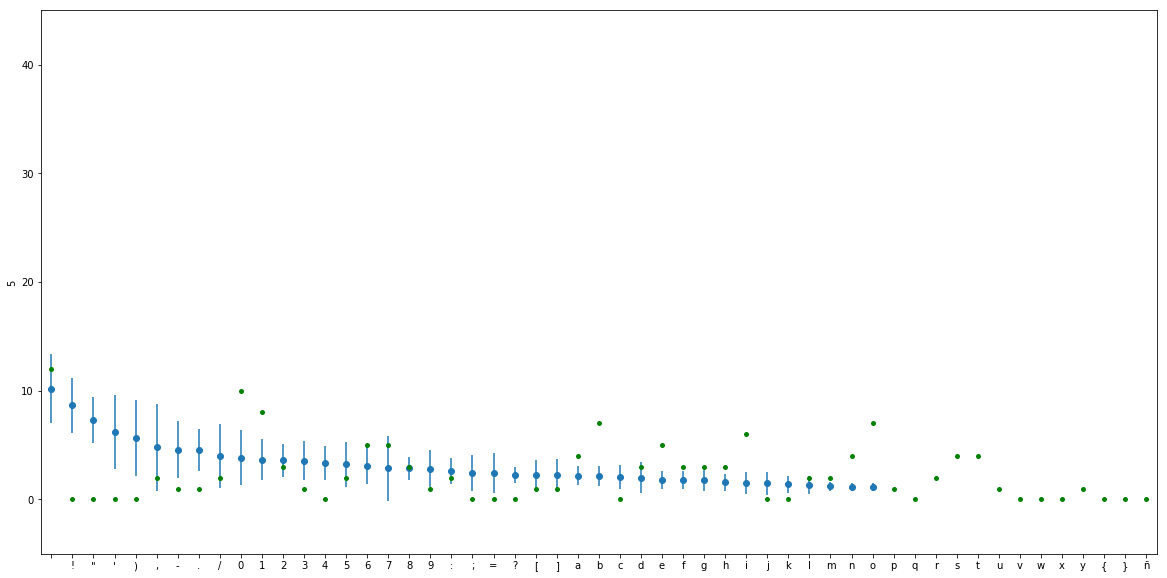

In [42]:
def plot_vs_letter_space(letter_space, data):
    #curr_msg = freq_model(selector)
    curr_msg = data.apply(lambda x: Counter(x.lower())).apply(pd.Series).fillna(0).T
    curr_msg = curr_msg.dropna()
    
    render_letter_space(letter_space)
    plt.ylim(-5, 45)
    sns.stripplot(x=curr_msg.index, y=curr_msg[1], color='red')
    plt.show()
    
    render_letter_space(letter_space)
    plt.ylim(-5, 45)
    sns.stripplot(x=curr_msg.index, y=curr_msg[5], color='green')
    plt.show()

plot_vs_letter_space(letter_space, data['msg'])


# Evaluation

In [43]:
anomalies = char_df.applymap(lambda x : 1 if x > 1 or x < 0 else 0).mean()
msgs_sent_score['freq'] = anomalies

msgs_sent_score.describe()

,senti,freq
count,20.000000,20.000000
mean,0.018234,0.370000
std,0.457618,0.130182
min,-0.915231,0.150000
25%,-0.156250,0.293750
50%,-0.031250,0.325000
75%,0.240502,0.431250
max,1.038043,0.725000
